In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('SiO2Damon1973.txt', 'r') as f:
    data = f.readlines()
data = [d.split('\t') for d in data]
data = pd.DataFrame(data[1:], columns=['T', 'k'])
data['k'] = data['k'].str.replace('\n', '')
for c in data.columns:
    data[c] = data[c].astype('float')

In [3]:
data['T_log'] = np.log(data['T'])
data['k_log'] = np.log(data['k'])

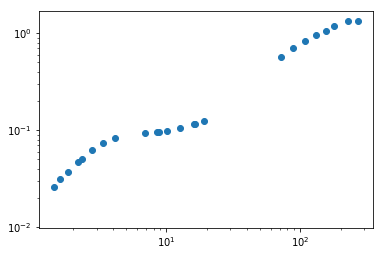

In [4]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(data['T'], data['k'])
ax.set_yscale('log')
ax.set_xscale('log')

In [5]:
z = np.polyfit(data['T_log'], data['k_log'], 6)
p = np.poly1d(z)
xp = np.linspace(0, 5, 500)
ap_df = pd.DataFrame({'x':xp})
ap_df['y'] = [p(x) for x in xp]

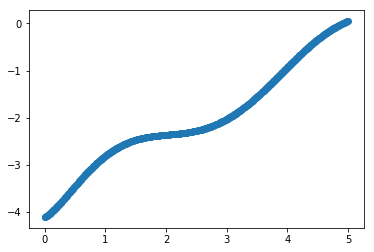

In [6]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(ap_df['x'], ap_df['y'])
# ax.set_yscale('log')
# ax.set_xscale('log')

In [7]:
ap_df.head()

,x,y
0,0.00000,-4.109610
1,0.01002,-4.100901
2,0.02004,-4.091864
3,0.03006,-4.082510
4,0.04008,-4.072849


In [42]:
def k_func(T, c1, c2, c3, c4, n):
    k1 = (c1*T**n*c2)/(c1*T**n+c2) 
    k2 = c3*np.exp(-c4/T)
    return k1+k2

def loss_k(*params):
    print(params)
    c1 = params[0][0]
    c2 = params[0][1]
    c3 = params[0][2]
    c4 = params[0][3]
    n = params[0][4]
    k_fit = [k_func(t, c1, c2, c3, c4, n) for t in T]
    return np.mean((k_fit - k)**2)

In [43]:
from scipy.optimize import minimize

In [44]:
ap_df = ap_df[ap_df['x']>0]

In [45]:
T = np.exp(ap_df['x'])
k = np.exp(ap_df['y'])

In [53]:
minimize(loss_k, (0.4,0.11,2,1.8,15), 
         method='SLSQP', 
         tol=1e-8, 
         options={'maxiter':5000})

(array([ 0.4 ,  0.11,  2.  ,  1.8 , 15.  ]),)
(array([ 0.4 ,  0.11,  2.  ,  1.8 , 15.  ]),)
(array([ 0.40000001,  0.11      ,  2.        ,  1.8       , 15.        ]),)
(array([ 0.4       ,  0.11000001,  2.        ,  1.8       , 15.        ]),)
(array([ 0.4       ,  0.11      ,  2.00000001,  1.8       , 15.        ]),)
(array([ 0.4       ,  0.11      ,  2.        ,  1.80000001, 15.        ]),)
(array([ 0.4       ,  0.11      ,  2.        ,  1.8       , 15.00000001]),)
(array([ 0.39931276, -2.66427176, -0.26431477,  2.22947125, 14.99997601]),)
(array([ 0.39983897, -0.54003456,  1.46945254,  1.90062863, 14.99999438]),)
(array([ 0.3999839 ,  0.04499654,  1.94694525,  1.81006286, 14.99999944]),)
(array([ 0.3999839 ,  0.04499654,  1.94694525,  1.81006286, 14.99999944]),)
(array([ 0.39998391,  0.04499654,  1.94694525,  1.81006286, 14.99999944]),)
(array([ 0.3999839 ,  0.04499656,  1.94694525,  1.81006286, 14.99999944]),)
(array([ 0.3999839 ,  0.04499654,  1.94694527,  1.81006286, 14.99999944]

       1.60789960e+01]),)
(array([2.75671643e+01, 6.89902454e-02, 1.92202301e+00, 9.14302117e+01,
       1.60789960e+01]),)
(array([2.97200572e+01, 7.47730064e-02, 2.01456319e+00, 9.85857405e+01,
       1.61642815e+01]),)
(array([2.97200572e+01, 7.47730064e-02, 2.01456319e+00, 9.85857405e+01,
       1.61642815e+01]),)
(array([2.97200572e+01, 7.47730064e-02, 2.01456319e+00, 9.85857405e+01,
       1.61642815e+01]),)
(array([2.97200572e+01, 7.47730213e-02, 2.01456319e+00, 9.85857405e+01,
       1.61642815e+01]),)
(array([2.97200572e+01, 7.47730064e-02, 2.01456321e+00, 9.85857405e+01,
       1.61642815e+01]),)
(array([2.97200572e+01, 7.47730064e-02, 2.01456319e+00, 9.85857405e+01,
       1.61642815e+01]),)
(array([2.97200572e+01, 7.47730064e-02, 2.01456319e+00, 9.85857405e+01,
       1.61642815e+01]),)
(array([3.03560716e+01, 7.68557409e-02, 2.03384432e+00, 1.00692870e+02,
       1.61896563e+01]),)
(array([3.03560716e+01, 7.68557409e-02, 2.03384432e+00, 1.00692870e+02,
       1.61896563e+0

     fun: 0.0007262113407873575
     jac: array([ 1.05283107e-08, -2.45906049e-05, -3.01342516e-06,  5.55155566e-08,
        1.90484570e-08])
 message: 'Optimization terminated successfully.'
    nfev: 227
     nit: 32
    njev: 32
  status: 0
 success: True
       x: array([2.74221951e+01, 7.66358598e-02, 1.76835059e+00, 9.08249290e+01,
       1.60764480e+01])

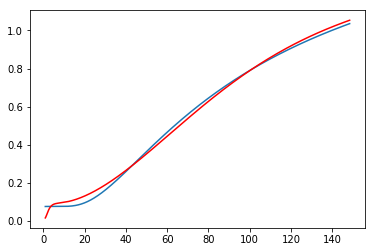

In [55]:
plt.plot(T, k_func(T, 2.74221951e+01, 7.66358598e-02, 1.76835059e+00, 9.08249290e+01,
       1.60764480e+01))
plt.plot(T, k, color='r')